In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("weight-height.csv")

In [4]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
data.Gender = data.Gender.apply(lambda x: 1 if x=='Male' else 0)

In [24]:
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [10]:
X = data.drop("Weight",axis=1).values
y = data.Weight.values

In [12]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

# Network Architecture

In [16]:
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['r2_score'])

In [20]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 25755.9648 - r2_score: -24.0875
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15206.4746 - r2_score: -13.8116
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2510.9292 - r2_score: -1.4457
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 770.6722 - r2_score: 0.2493
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 485.8986 - r2_score: 0.5267
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 309.1705 - r2_score: 0.6989
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 212.7289 - r2_score: 0.7928
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 160.6948 - r2_score: 0.8435
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133.3077 - r2_score: 0.8702
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 119.4326 - r2_score: 0.8837
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 112.0774 - r2_score: 0.8908
Epoch 12/50
250/250 

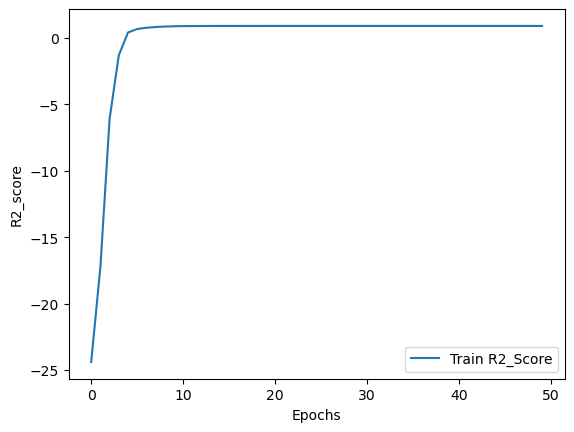

In [26]:
# Plot training history
plt.plot(history.history['r2_score'], label='Train R2_Score')
plt.xlabel("Epochs")
plt.ylabel("R2_score")
plt.legend()
plt.show()



In [22]:
sample_data = np.array([[1, 70]])  # Male, Height=70 inches
sample_data_scaled = scaler.transform(sample_data)
predicted_weight = model.predict(sample_data_scaled)
print(f"Predicted Weight: {predicted_weight[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Weight: 193.26
